# Introduction

In order to successful knowledge discovery in databases (KDD), well-defined and formal methods should be applied for managing data.  Cross-industry standard process for data mining (CRISP-DM) model is a standard methodology, which includes six phases:
    1. Problem domain understanding
    2. Data Understanding
    3. Data Preparation
    4. Modeling
    5. Evaluation
    6. Deployment

----------------------------------------------------------------------------------------------------------------------

# Part 1 - Problem domain understanding

Cancer still remains a challenge for our world in preventing and treating. However, most of cancers are highly curable if they are detected early, so the stage at diagnosis heavily influences survival. Due to no early warning signs, it’s important to have routine screening tests. For many types of cancers such as colorectal cancer, lung cancer, stomach cancer, screening rate remains low due to unpleasant procedure and expensive cost. Therefore, a risk prediction model for cancer could bring benefits for both customer and health institute. For customer, it encourages people to take screening tests to detect the risk of cancer early and increase survival rate. For health institute, it provides more services and hence increase sale.

Nowadays, electronic medical records have become increasingly available through regular health checkup. In recent research, there has been an increasing interest in finding biomarkers of cancer from routine blood tests. In general, blood indices are related to cancer to some extent, but none of them solely exhibits a clear connection and can be used for diagnostic purposes. However, taking these basic blood indices together, information to be gleaned may reveal about converging signs or pattern of an individual for many forms of cancer. By monitoring selected biomarkers routinely measured in primary care, we can learn a lot about physiological patterns that promote carcinogenesis, proliferation, progression before tumor makers emerge.

This research aims to utilize temporal, longitudinal data accumulated in regular health checkup to explore pattern of change of many biomarkers in common blood test to predict cancer.

----------------------------------------------------------------------------------------------------------------------

# Part 2 - Data Exploration & Understanding

http://localhost:8888/notebooks/0-MyCollection/00-Sample/01-DataExploration.ipynb

## 1. Import Library and Define Common function

### 1.1. Import Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import mutual_info_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

C:\Users\maint\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup complete...


### 1.2. Common Function

In [2]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(131)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(133)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
          
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

In [3]:
def Training_Preparation(df, cont_vars):
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90, stratify = y)
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('LDA',LinearDiscriminantAnalysis()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Test options and evaluation metric
    seed = 9
    scoring = 'recall_macro'

    # evaluate each model in turn
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(16,8))
    sns.boxplot(data=results_df)
    plt.show()

In [4]:
from matplotlib.backends.backend_pdf import PdfPages


def DistributionComparison(all_df, selected_vars,name):
    colors = ['#3791D7','#D72626']

    # pdf = matplotlib.backends.backend_pdf.PdfPages(name + '.pdf')
    with PdfPages(name + '.pdf') as pdf_pages:
        for column in selected_vars:    
            fig = plt.figure(figsize=[8,4])
            plt.subplot(121)
            sns.boxplot(x='Class', y=column,data=all_df,palette=colors)
            plt.title(column, fontsize=12)
            plt.subplot(122)
            sns.kdeplot(all_df[all_df.Class==1][column], bw = 0.4, label = "Cancer", shade=True, color="#D72626", linestyle="--")
            sns.kdeplot(all_df[all_df.Class==0][column], bw = 0.4, label = "NoCancer", shade=True, color= "#3791D7", linestyle=":")
            plt.title(column, fontsize=12)   
            pdf_pages.savefig(fig)                                          
            plt.show()    

    # Write the PDF document to the disk
    #pdf_pages.close()

In [5]:
def ModelEvaluation(df, cont_vars):
    
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90, stratify = y)
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('LDA',LinearDiscriminantAnalysis()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [6]:
from sklearn.manifold import TSNE

def tsne_plot(X, y):
       
        
    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(X))
    numdf_norm.columns = X.columns
    
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(numdf_norm)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y == 0), 0], X_t[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No cancer')
    plt.scatter(X_t[np.where(y == 1), 0], X_t[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Colon cancer')

    plt.legend(loc='best');
    plt.show();

In [7]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [8]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [9]:
def find_uncorrelated_vars(cancer_df, selected_vars, threshold):

    corrmat = cancer_df[selected_vars].corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
    corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
    corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
    
    correlated_groups = corrmat[corrmat['corr'] > threshold]
    
    selected_vars = []
    remaining_vars = correlated_groups.feature1.unique()

    while(len(remaining_vars) > 0):
        feature = remaining_vars[0]
        correlated_block = correlated_groups[correlated_groups.feature1 == feature]
        min_ind = correlated_block[['MissingF2']].idxmin() 
        sel_var = correlated_block.feature2[min_ind].values[0]
        removed_vars = [var for var in list(correlated_block.feature2.values)]
        remaining_vars = [var for var in remaining_vars if var not in removed_vars]
        if sel_var not in selected_vars:
            selected_vars = selected_vars + [sel_var]   
    
    return selected_vars

In [10]:
def analyze_na_values(df, var, target):
    tmp_df = df.copy()
    print(target)
    
    # Make a variable that indicates 1 if the observation was missing or 0 otherwise
    tmp_df['Missing'] = np.where(df[var].isnull(),1,0)
    
    # Calculate the mean Price where the information is missing or present
    tmp_df =  pd.DataFrame(tmp_df.groupby([target,'Missing'])[target].count())
    tmp_df.columns = ['Count']
    tmp_df = tmp_df.reset_index()
    
    
    if(len(tmp_df[tmp_df[target] == 0] == 1)):
        tmp_df= tmp_df.append({target:0,'Missing':1,'Count':0}, ignore_index=True)

    if(len(tmp_df[tmp_df[target] == 1] == 1)):
        tmp_df= tmp_df.append({target:1,'Missing':1,'Count':0}, ignore_index=True)

    tmp_df.loc[0,'Per']= tmp_df.loc[0,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[1,'Per']= tmp_df.loc[1,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[2,'Per']= tmp_df.loc[2,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    tmp_df.loc[3,'Per']= tmp_df.loc[3,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    sns.barplot(x=target, y = 'Per', data=tmp_df, hue='Missing')
    plt.title(var)
    plt.show()

In [11]:
def CategoricalDistribution(df, var, target):
    df = df.copy()
    
    # Calculate the mean Price where the information is missing or present
    sns.countplot(x=var, data=df, hue=target)
    plt.title(var)
    plt.show()

In [12]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [13]:
def MissingPercentage(x):
    return df[x].isnull().sum()/len(df)

## 2. Load raw data

In [14]:
df = pd.read_csv('Nhanes-BreastCancer_merged.csv')

print(df.shape)
df.head()

(1173, 461)


,RIDAGEYR,RIDAGEMN,INDFMPIR,LBXSAL,LBDSGLSI,URDTIME2,LBDSBUSI,LBDHDDSI,LBDLYMNO,LBXSCA,URXMBP,LBDSCASI,URXMZP,URDFLOW2,LBXGLU,LBXBGE,LBXBPB,LBDBCDSI,URXUMS,LBXSGL,LBXSOSSI,LBXIHG,URXMHH,URXVOL3,URXMHP,URDTIME1,LBXSZN,LBXSKSI,LBDTHGSI,URXMIB,URDFLOW3,URXMNP,LBXBCD,LBXSATSI,LBXSBU,LBDSTRSI,LBDSCRSI,LBXSUA,LBDSTPSI,LBXSTR,URXVOL1,LBXLYPCT,URXVOL2,LBDSTBSI,URXECP,LBDTCSI,LBXNEPCT,LBXBGM,LBXHGB,LBXSTP,URXCNP,LBXPLTSI,LBDIHGSI,LBDSIRSI,LBXSGTSI,LBXBAPCT,LBXSTB,LBXMCHSI,LBDNENO,LBXSCR,LBDSZNSI,LBXMOPCT,LBXMPSI,LBXSIR,PHAANTMN,LBDSCUSI,PHAALCMN,LBXRBCSI,URXUIO,LBDSUASI,LBDSPHSI,URXCRS,URXMEP,LBXMCVSI,LBXSCH,URXMC1,LBXGLT,WTSVS2YR,LBXSLDSI,LBXRDW,WTFSM,PHAGUMMN,LBXSGB,LBDBPBSI,LBDGLTSI,WTSVOC2Y,URXCOP,LBDGLUSI,LBXSCU,LBXSSE,LBXWBCSI,LBDHDD,LBDSSESI,URDFLOW1,LBXSPH,PHACOFMN,PHASUPMN,WTSOG2YR,URXUMA,LBXSASSI,LBXEOPCT,LBDSGBSI,LBXSAPSI,LBXTC,LBXMC,URDTIME3,LBXTHG,LBDSCHSI,URXMOH,LBDMONO,LBDEONO,LBDBANO,LBDSALSI,PHASUPHR,LBXSCLSI,LBXSNASI,PHAGUMHR,PHAANTHR,PHACOFHR,PHAALCHR,LBXSC3SI,DXDLAPF,DXDTRBMD,DXDSTBMC,DXXTRFAT,DXXHEFAT,DXDSTLE,DXXRALI,DXDTOFAT,DXDTOBMD,DXXLSBMC,DXXTRLI,DXDRATOT,BPXDI3,DXXHEA,DXDTOPF,DXDRLTOT,DXDTRPF,DXXLLBMD,DXXRLLI,BMXARMC,DXDRALE,DXXLLBMC,DXXLALI,DXXLRBMC,DXXPEA,DXDRAPF,BPXDI1,DXXPEBMD,DXDTRTOT,DXXRAA,DXDLLPF,BMXARML,DXXHELI,DXXRRA,DXDSTBMD,BPXDI4,DXXLLLI,DXDRLPF,BPXDI2,DXXLSBMD,BPXPLS,DXDTOBMC,DXDTOLE,DXXLRBMD,DXDTRLE,DXXHEBMC,DXDSTTOT,DXXRLA,BMXLEG,BPXSY1,DXXLAA,DXXLABMC,DXDLALE,DXDTRA,BMXWT,DXXTSBMC,DXXLLA,DXXLLFAT,DXDTOLI,BMXHT,DXXLABMD,DXDSTLI,DXXRRBMD,DXXLSA,DXDSTA,DXDTRBMC,DXXRABMC,DXDHELE,DXDHETOT,DXXHEBMD,DXDTOA,DXXRABMD,DXDRLLE,DXXLRA,DXXRRBMC,BPXSY2,DXDLLLE,DXXTSBMD,BMXBMI,DXDSTFAT,DXXRLFAT,DXXRLBMD,DXXRAFAT,DXDLATOT,BMXWAIST,DXDLLTOT,DXDSTPF,DXDHEPF,DXXLAFAT,DXXRLBMC,BPXSY3,BPXSY4,DXXTSA,DXXPEBMC,DXDTOTOT,DMDYRSUS,DMDEDUC2,DMDHHSIZ,DMDFMSIZ,BPXML1,BPACSZ,FCX10DI,FCX11DI,FCX06DI,FCX08DI,FCX07DI,FCX09DI,RIDRETH1,RIDEXMON,DMDCITZN,DMDMARTL,RIDEXPRG,URDMNPLC,PHQ060,ORXH51,ORXH64,ORXHPC,LBDHEG,LBDWFL,ORXGL,ORXH69,PHQ050,LBDHD,LBXHCR,ORXH62,URDCNPLC,ORXHPV,ORXH11,ORXH73,URXUTRI,ORXH26,ORXH31,LBDHBG,ORXH82,LBXHE1,ORXH53,ORXH58,LBDHEM,URDMZPLC,PHQ020,ORXH35,ORXH84,LBDIHGLC,URXPREG,PHQ040,LBDBGELC,ORXH68,URDMEPLC,ORXH81,ORXGH,ORXH52,URDMBPLC,ORXH56,LBXHE2,ORXH61,LBDBGMLC,URDECPLC,URDMOHLC,ORXH33,ORXH06,ORXHPI,LBDTHGLC,URDMHPLC,URDCOPLC,URDMC1LC,ORXH45,ORXH55,ORXH71,PHQ030,ORXH40,ORXH39,ORXH83,ORXH66,LBXHBC,ORXH72,ORXH54,ORXH70,URXUCL,LBDWFLLC,LBXHA,ORXH59,ORXH67,ORXH42,ORXH18,URDMHHLC,PHDSESN,URDMIBLC,ORXH16,LBXHBS,LBXHCG,OHARNF,OHAPOS,BMIARML,OHDDESTS,OHAROCGP,OHX23TC,BPAEN2,OHAROCOH,OHAROCDE,OHX02TC,OHX30TC,OHXIMP,OHX14TC,OHAROTH,BMDSTATS,OHX16TC,OHX05TC,BMIARMC,BPAEN3,OHX26TC,OHAREC,BPAARM,OHAROCCI,BMILEG,BPAEN4,OHX01TC,BMXRECUM,OHX09TC,BMIHT,BPXCHR,OHX32TC,OHX18TC,OHDRCSTS,BPXPTY,BMXHEAD,OHX19TC,OHX15TC,OHAROCDT,BMIHEAD,BMIRECUM,OHX03TC,BPXPULS,OHX17TC,BMIWT,BPAEN1,OHX31TC,OHX08TC,BMIWAIST,DXARLBV,DXALLBV,DXARABV,OHX06TC,DXALABV,DXARLTV,OHX04TC,OHX12TC,OHX27TC,OHX13TC,DXAHEBV,OHX22TC,OHX10TC,OHX29TC,OHX21TC,OHX28TC,OHX07TC,DXARATV,OHX24TC,PEASCCT1,DXALLTV,OHX25TC,OHX11TC,DXAHETV,DXAEXSTS,LBD2DFLC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBZLC,LBDVCBLC,LBDVCTLC,LBDVDBLC,LBDVEBLC,LBDVMCLC,LBDVNBLC,LBDVOXLC,LBDVTCLC,LBDVTELC,LBDVXYLC,LBX2DF,LBXV1D,LBXV2A,LBXV3B,LBXV4C,LBXVBZ,LBXVCB,LBXVCT,LBXVDB,LBXVEB,LBXVMC,LBXVNB,LBXVOX,LBXVTC,LBXVTE,LBXVXY,OHDEXSTS,PHAFSTHR,PHAFSTMN,URDUA3LC,URDUA5LC,URDUABLC,URDUACLC,URDUBALC,URDUCDLC,URDUCOLC,URDUCSLC,URDUDALC,URDUMMAL,URDUMNLC,URDUMOLC,URDUPBLC,URDUSBLC,URDUSNLC,URDUSRLC,URDUTLLC,URDUTULC,URDUURLC,URXUAB,URXUAC,URXUAS,URXUAS3,URXUAS5,URXUBA,URXUCD,URXUCO,URXUCS,URXUDMA,URXUMMA,URXUMN,URXUMO,URXUPB,URXUSB,URXUSN,URXUSR,URXUTL,URXUTU,URXUUR,WTSA2YR,WTSAF2YR,Class
0,72,NaN,5.00,3.7,4.94,NaN,4.64,1.81,1.9,8.9,NaN,2.225,NaN,NaN,NaN,0.11,1.83,6.58,1.5,89.0,275.0,0.46,NaN,NaN,NaN,57.0,NaN,3.9,25.9,NaN,NaN,NaN,0.74,18.0,13.0,1.332,67.18,5.2,69.0,118.0,76.0,33.4,NaN,8.55,NaN,5.17,53.4,5.09,12.4,6.9,NaN,237.0,2.30,11.1,20.0,0.6,0.5,31.2,3.0,0.76,NaN,8.1,9.0,62.0,NaN,NaN,NaN,3.96,Na

## 3. Target variable analysis

In [15]:
df[df.Class == 1].shape[0]/df.shape[0],df[df.Class == 1].shape[0],df[df.Class == 0].shape[0]

(0.4919011082693947, 577, 596)

## 4. Categorize vars

In [16]:
target = ['Class']

cont_vars = ['RIDAGEYR', 'RIDAGEMN', 'INDFMPIR', 'LBXSAL', 'LBDSGLSI', 'URDTIME2', 'LBDSBUSI', 'LBDHDDSI', 'LBDLYMNO', 'LBXSCA', 'URXMBP', 'LBDSCASI', 'URXMZP', 'URDFLOW2', 'LBXGLU', 'LBXBPB', 'LBDBCDSI', 'URXUMS', 'LBXSGL', 'LBXSOSSI', 'URXUAC', 'LBXIHG', 'URXMHH', 'URXMHP', 'URXUBA', 'WTFSM', 'URXUUR', 'URDTIME1', 'URXUSR', 'LBXSZN', 'URXUTU', 'LBXSKSI', 'URXUSN', 'URXUMMA', 'LBDTHGSI', 'URXMIB', 'URXUMO', 'URXMNP', 'LBXBCD', 'URXUDMA', 'LBXSATSI', 'LBXSBU', 'LBXV4C', 'LBDSTRSI', 'LBXVBZ', 'LBDSCRSI', 'LBXSUA', 'LBXVOX', 'URXUAS', 'URXUSB', 'LBDSTPSI', 'LBXVXY', 'LBXSTR', 'WTSA2YR', 'URXVOL1', 'LBXLYPCT', 'URXUTL', 'URXUPB', 'URXVOL2', 'PHAFSTMN', 'LBXVEB', 'URXECP', 'LBDTCSI', 'LBXNEPCT', 'LBXBGM', 'LBXHGB', 'LBXSTP', 'URXCNP', 'LBXPLTSI', 'LBDIHGSI', 'LBDSIRSI', 'LBXSGTSI', 'URXUCO', 'LBXBAPCT', 'LBXMCHSI', 'LBDNENO', 'LBXSCR', 'LBDSZNSI', 'LBXMOPCT', 'LBXMPSI', 'LBXVDB', 'LBXSIR', 'URXUCS', 'LBX2DF', 'URXUAB', 'LBDSCUSI', 'LBXRBCSI', 'URXUIO', 'LBDSUASI', 'LBDSPHSI', 'URXCRS', 'URXMEP', 'URXUCD', 'LBXMCVSI', 'URXUAS3', 'LBXSCH', 'URXMC1', 'LBXGLT', 'WTSVS2YR', 'LBXSLDSI', 'LBXRDW', 'PHAGUMMN', 'LBXSGB', 'LBDBPBSI', 'LBDGLTSI', 'WTSVOC2Y', 'URXCOP', 'LBDGLUSI', 'LBXSCU', 'LBXSSE', 'LBXWBCSI', 'LBDHDD', 'LBDSSESI', 'URDFLOW1', 'WTSAF2YR', 'LBXSPH', 'WTSOG2YR', 'URXUMA', 'LBXSASSI', 'LBXEOPCT', 'LBDSGBSI', 'LBXSAPSI', 'LBXTC', 'LBXMC', 'LBXTHG', 'LBDSCHSI', 'URXMOH', 'LBDSALSI', 'PHAFSTHR', 'DXDLAPF', 'DXDTRBMD', 'DXDSTBMC', 'DXXTRFAT', 'DXXHEFAT', 'DXDSTLE', 'DXXRALI', 'DXDTOFAT', 'DXDTOBMD', 'DXXLSBMC', 'DXXTRLI', 'DXDRATOT', 'BPXDI3', 'DXXHEA', 'DXDTOPF', 'DXDRLTOT', 'DXDTRPF', 'DXXLLBMD', 'DXXRLLI', 'BMXARMC', 'DXDRALE', 'DXXLLBMC', 'DXXLALI', 'DXXLRBMC', 'DXXPEA', 'DXDRAPF', 'BPXDI1', 'DXXPEBMD', 'DXDTRTOT', 'DXXRAA', 'DXDLLPF', 'BMXARML', 'DXXHELI', 'DXXRRA', 'DXDSTBMD', 'BPXDI4', 'DXXLLLI', 'DXDRLPF', 'BPXDI2', 'DXXLSBMD', 'BPXPLS', 'DXDTOBMC', 'DXDTOLE', 'DXXLRBMD', 'DXDTRLE', 'DXXHEBMC', 'DXDSTTOT', 'DXXRLA', 'BMXLEG', 'BPXSY1', 'DXXLAA', 'DXXLABMC', 'DXDLALE', 'DXDTRA', 'BMXWT', 'DXXTSBMC', 'DXXLLA', 'DXXLLFAT', 'DXDTOLI', 'BMXHT', 'DXXLABMD', 'DXDSTLI', 'DXXRRBMD', 'DXXLSA', 'DXDSTA', 'DXDTRBMC', 'DXXRABMC', 'DXDHELE', 'DXDHETOT', 'DXXHEBMD', 'DXDTOA', 'DXXRABMD', 'DXDRLLE', 'DXXLRA', 'DXXRRBMC', 'BPXSY2', 'DXDLLLE', 'DXXTSBMD', 'BMXBMI', 'DXDSTFAT', 'DXXRLFAT', 'DXXRLBMD', 'DXXRAFAT', 'DXDLATOT', 'BMXWAIST', 'DXDLLTOT', 'DXDSTPF', 'DXDHEPF', 'DXXLAFAT', 'DXXRLBMC', 'BPXSY3', 'BPXSY4', 'DXXTSA', 'DXXPEBMC', 'DXDTOTOT']
print(len(cont_vars))

dis_vars = ['DMDYRSUS', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'BPXML1', 'BPACSZ', 'FCX10DI', 'FCX11DI', 'FCX06DI', 'FCX08DI', 'FCX07DI', 'FCX09DI', 'LBXBGE', 'URXVOL3', 'URXUAS5', 'URDFLOW3', 'LBXVTE', 'LBDSTBSI', 'URXUMN', 'LBXVTC', 'LBXSTB', 'PHAANTMN', 'PHAALCMN', 'PHACOFMN', 'PHASUPMN', 'URDTIME3', 'LBXV2A', 'LBXV1D', 'LBXVMC', 'LBXVNB', 'LBXV3B', 'LBXVCB', 'LBXVCT', 'LBDMONO', 'LBDEONO', 'LBDBANO', 'PHASUPHR', 'LBXSCLSI', 'LBXSNASI', 'PHAGUMHR', 'PHAANTHR', 'PHACOFHR', 'PHAALCHR', 'LBXSC3SI']
print(len(dis_vars))

cat_vars = ['RIDRETH1', 'RIDEXMON', 'DMDCITZN', 'DMDMARTL', 'RIDEXPRG', 'URDMNPLC', 'PHQ060', 'ORXH51', 'ORXH64', 'ORXHPC', 'LBDHEG', 'ORXGL', 'ORXH69', 'PHQ050', 'LBDVCTLC', 'LBD2DFLC', 'LBXHCR', 'ORXH62', 'URDCNPLC', 'URDUSNLC', 'ORXHPV', 'LBDVTCLC', 'URDUA3LC', 'URDUTLLC', 'URDUTULC', 'URDUDALC', 'ORXH11', 'URDUCOLC', 'ORXH73', 'URXUTRI', 'ORXH26', 'ORXH31', 'LBDHBG', 'ORXH82', 'LBXHE1', 'ORXH53', 'ORXH58', 'URDUURLC', 'LBDHEM', 'URDMZPLC', 'URDUBALC', 'LBDVTELC', 'LBDV1DLC', 'PHQ020', 'LBDV3BLC', 'URDUACLC', 'URDUSBLC', 'ORXH35', 'ORXH84', 'LBDIHGLC', 'URXPREG', 'LBDV4CLC', 'PHQ040', 'URDUPBLC', 'LBDBGELC', 'URDUMMAL', 'URDUMNLC', 'ORXH68', 'URDUA5LC', 'URDMEPLC', 'ORXH81', 'LBDVOXLC', 'ORXGH', 'LBDVCBLC', 'LBDVBZLC', 'ORXH52', 'URDMBPLC', 'ORXH56', 'LBXHE2', 'ORXH61', 'LBDBGMLC', 'URDECPLC', 'URDUCDLC', 'LBDVNBLC', 'URDMOHLC', 'ORXH33', 'ORXH06', 'ORXHPI', 'LBDTHGLC', 'URDUMOLC', 'LBDVXYLC', 'URDMHPLC', 'URDCOPLC', 'URDMC1LC', 'ORXH45', 'ORXH55', 'ORXH71', 'PHQ030', 'LBDVMCLC', 'URDUSRLC', 'ORXH40', 'ORXH39', 'ORXH83', 'ORXH66', 'LBXHBC', 'LBDVDBLC', 'LBDVEBLC', 'ORXH72', 'ORXH54', 'ORXH70', 'URDUCSLC', 'URXUCL', 'LBDV2ALC', 'LBDWFLLC', 'URDUABLC', 'LBXHA', 'ORXH59', 'ORXH67', 'ORXH42', 'ORXH18', 'URDMHHLC', 'PHDSESN', 'URDMIBLC', 'ORXH16', 'LBXHBS', 'LBXHCG', 'OHARNF', 'OHAPOS', 'BMIARML', 'OHDDESTS', 'OHAROCGP', 'OHX23TC', 'BPAEN2', 'OHAROCOH', 'OHAROCDE', 'OHX02TC', 'OHX30TC', 'OHXIMP', 'OHX14TC', 'OHAROTH', 'BMDSTATS', 'OHX16TC', 'OHX05TC', 'BMIARMC', 'BPAEN3', 'OHX26TC', 'OHAREC', 'BPAARM', 'OHAROCCI', 'BMILEG', 'BPAEN4', 'OHX01TC', 'BMXRECUM', 'OHX09TC', 'BMIHT', 'BPXCHR', 'OHX32TC', 'OHX18TC', 'OHDRCSTS', 'BPXPTY', 'BMXHEAD', 'OHX19TC', 'OHX15TC', 'OHDEXSTS', 'OHAROCDT', 'BMIHEAD', 'BMIRECUM', 'OHX03TC', 'BPXPULS', 'OHX17TC', 'BMIWT', 'BPAEN1', 'OHX31TC', 'OHX08TC', 'BMIWAIST', 'DXARLBV', 'DXALLBV', 'DXARABV', 'FCX10DI', 'OHX06TC', 'DXALABV', 'DXARLTV', 'OHX04TC', 'OHX12TC', 'FCX08DI', 'OHX27TC', 'OHX13TC', 'DXAHEBV', 'OHX22TC', 'OHX10TC', 'OHX29TC', 'OHX21TC', 'FCX07DI', 'OHX28TC', 'OHX07TC', 'FCX09DI', 'DXARATV', 'OHX24TC', 'PEASCCT1', 'DXALLTV', 'OHX25TC', 'OHX11TC', 'DXAHETV', 'DXAEXSTS']      
print(len(cat_vars))

224
44
194


## 5. Check missing data of all features

In [17]:
all_vars = cont_vars+dis_vars+cat_vars
miss_df = pd.DataFrame(df[all_vars].isnull().sum(),columns=['Count'])
miss_df['Percentage'] = 100 * df[all_vars].isnull().sum()/len(df)
miss_df = miss_df.sort_values('Percentage', ascending=True)
miss_df = miss_df.reset_index()
miss_df.columns = ['Feature','Count','Percentage']
miss_df.head()

,Feature,Count,Percentage
0,RIDAGEYR,0,0.0
1,DMDMARTL,0,0.0
2,DMDEDUC2,0,0.0
3,DMDHHSIZ,0,0.0
4,DMDFMSIZ,0,0.0


----------------------------------------------------------------------------------------------------------------------

# Part 3: Data Preprocessing

## 1. Numerical vars

### 1.1. Handling missing values

In [18]:
num_vars = cont_vars+dis_vars

miss_num_df = pd.DataFrame(df[num_vars].isnull().sum(),columns=['Count'])
miss_num_df['Percentage'] = 100 * df[num_vars].isnull().sum()/len(df)
miss_num_df = miss_num_df.sort_values('Percentage', ascending=False)
miss_num_df.tail()

,Count,Percentage
BMXWT,44,3.751066
DMDFMSIZ,0,0.000000
DMDHHSIZ,0,0.000000
DMDEDUC2,0,0.000000
RIDAGEYR,0,0.000000


#### Select cont vars with missing value <= 30%

In [19]:
num_vars = list(miss_num_df[miss_num_df.Percentage <= 20].index)
print(len(num_vars))
print(num_vars)

85
['BPXDI3', 'BPXSY3', 'LBXSLDSI', 'LBXSASSI', 'LBXSC3SI', 'LBXSATSI', 'LBXSCLSI', 'LBXSCH', 'LBXSPH', 'LBXSTR', 'LBDSTBSI', 'LBXSGB', 'LBXSTP', 'LBDSIRSI', 'LBXSGTSI', 'LBXSTB', 'LBDSBUSI', 'LBDSPHSI', 'LBDSUASI', 'LBDSGLSI', 'LBXSIR', 'LBXSAL', 'LBDSTPSI', 'LBXSUA', 'LBXSCR', 'BPXSY2', 'LBDSGBSI', 'LBXSAPSI', 'LBDSCRSI', 'LBDSTRSI', 'LBDSCHSI', 'LBDSALSI', 'LBXSBU', 'LBXSKSI', 'LBXSOSSI', 'BPXDI2', 'LBXSGL', 'LBDSCASI', 'LBXSCA', 'LBXSNASI', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'LBDHDD', 'LBDTCSI', 'LBXTC', 'LBDHDDSI', 'LBDEONO', 'LBDMONO', 'LBDLYMNO', 'BMXLEG', 'LBXEOPCT', 'LBXMOPCT', 'LBXLYPCT', 'LBDNENO', 'LBXNEPCT', 'LBXBAPCT', 'LBDBANO', 'LBXWBCSI', 'LBXMC', 'LBXMPSI', 'LBXRBCSI', 'LBXMCHSI', 'LBXRDW', 'LBXHGB', 'LBXMCVSI', 'LBXPLTSI', 'BMXWAIST', 'BMXARML', 'BMXARMC', 'PHAFSTHR', 'PHAFSTMN', 'URXUMS', 'URXCRS', 'URXUMA', 'BPXPLS', 'BPACSZ', 'BPXML1', 'BMXBMI', 'BMXHT', 'BMXWT', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDEDUC2', 'RIDAGEYR']


#### Remove observations with 40% of missing data

In [20]:
df['FeatureCount'] = df[num_vars].count(axis=1)
df['FeatureMissing'] = len(num_vars) - df['FeatureCount']
df['MissingPercentage'] = df.FeatureMissing/len(num_vars)
df[['FeatureMissing','MissingPercentage']].describe()

,FeatureMissing,MissingPercentage
count,1173.000000,1173.000000
mean,7.115090,0.083707
std,18.868719,0.221985
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.023529
max,81.000000,0.952941


In [21]:
print(df[(df['MissingPercentage'] > 0.4) & (df['Class'] == 1)].shape)
df = df[df['MissingPercentage'] <= 0.4]
df = df.reset_index(drop=True)

df.shape, len(df[(df['Class'] == 1)])/len(df)

(92, 464)


((1054, 464), 0.4601518026565465)

#### Filling missing data 

In [22]:
for var in num_vars:
    df[var] = df[var].fillna(df[var].median())

### 1.2. Remove outliers

In [23]:
for var in num_vars:
    upper_boundary, lower_boundary = find_skewed_boundaries(df, var, 3.5)
    df.loc[df[var] <= lower_boundary,var] = lower_boundary
    df.loc[df[var] >= upper_boundary,var] = upper_boundary

### 1.3. Gaussian Transformation

In [24]:
Gauss_transformed_vars = ['URDTIME1','URXVOL1','LBXTHG','LBDTHGSI','LBXSGTSI','URXCRS','URXUMS','URXUMA']

In [25]:
from sklearn.preprocessing import quantile_transform

for var in Gauss_transformed_vars:
    df[var] = quantile_transform(np.array(df[var]).reshape(-1,1), n_quantiles=20, random_state=0, copy=True)

### 1.4. Remove features with high correlation

In [26]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = df[num_vars].corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)

corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
corrmat.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,RIDAGEYR,RIDAGEYR,1.0,0.0,0.0
1,LBXMOPCT,LBXMOPCT,1.0,0.0,0.0
2,LBXMPSI,LBXMPSI,1.0,0.0,0.0
3,LBXMC,LBXMC,1.0,0.0,0.0
4,LBXWBCSI,LBXWBCSI,1.0,0.0,0.0


In [27]:
correlated_groups = corrmat[corrmat['corr'] > 0.90]
correlated_groups.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,RIDAGEYR,RIDAGEYR,1.0,0.0,0.0
1,LBXMOPCT,LBXMOPCT,1.0,0.0,0.0
2,LBXMPSI,LBXMPSI,1.0,0.0,0.0
3,LBXMC,LBXMC,1.0,0.0,0.0
4,LBXWBCSI,LBXWBCSI,1.0,0.0,0.0


In [28]:
num_vars = []
remaining_vars = correlated_groups.feature1.unique()

while(len(remaining_vars) > 0):
    feature = remaining_vars[0]
    correlated_block = correlated_groups[correlated_groups.feature1 == feature]
    min_ind = correlated_block[['MissingF2']].idxmin() 
    sel_var = correlated_block.feature2[min_ind].values[0]
    removed_vars = [var for var in list(correlated_block.feature2.values)]
    remaining_vars = [var for var in remaining_vars if var not in removed_vars]
    if sel_var not in num_vars:
        num_vars = num_vars + [sel_var]    
    
print(num_vars)
len(num_vars)

['RIDAGEYR', 'LBXMOPCT', 'LBXMPSI', 'LBXMC', 'LBXWBCSI', 'LBDBANO', 'LBXBAPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXMCHSI', 'BMXLEG', 'LBDLYMNO', 'LBDMONO', 'LBDEONO', 'LBDHDDSI', 'LBXTC', 'LBXRBCSI', 'LBXRDW', 'DMDHHSIZ', 'URXCRS', 'BMXWT', 'BMXHT', 'BPXML1', 'BPACSZ', 'BPXPLS', 'URXUMA', 'LBXHGB', 'PHAFSTMN', 'PHAFSTHR', 'BMXARMC', 'BMXARML', 'BMXWAIST', 'LBXPLTSI', 'BPXSY1', 'INDFMPIR', 'LBXSNASI', 'LBDSTBSI', 'LBDSUASI', 'LBDSPHSI', 'LBDSBUSI', 'LBXSGTSI', 'LBDSIRSI', 'LBXSTP', 'LBXSGB', 'LBXSTR', 'LBXSCA', 'LBXSCLSI', 'LBXSATSI', 'LBXSC3SI', 'LBXSASSI', 'LBXSLDSI', 'BPXSY3', 'LBDSGLSI', 'LBXSAL', 'BPXDI2', 'LBXSOSSI', 'LBXSKSI', 'LBDSCRSI', 'LBXSAPSI', 'BPXDI1', 'BPXDI3', 'DMDEDUC2']


62

### 1.5. Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
df = df.reset_index(drop=True)

scaler = MinMaxScaler(feature_range = (0, 1))
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[num_vars]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = num_vars
print(X_scaled.shape)
X_scaled.head()

(1054, 62)


,RIDAGEYR,LBXMOPCT,LBXMPSI,LBXMC,LBXWBCSI,LBDBANO,LBXBAPCT,LBXNEPCT,LBXEOPCT,LBXMCHSI,BMXLEG,LBDLYMNO,LBDMONO,LBDEONO,LBDHDDSI,LBXTC,LBXRBCSI,LBXRDW,DMDHHSIZ,URXCRS,BMXWT,BMXHT,BPXML1,BPACSZ,BPXPLS,URXUMA,LBXHGB,PHAFSTMN,PHAFSTHR,BMXARMC,BMXARML,BMXWAIST,LBXPLTSI,BPXSY1,INDFMPIR,LBXSNASI,LBDSTBSI,LBDSUASI,LBDSPHSI,LBDSBUSI,LBXSGTSI,LBDSIRSI,LBXSTP,LBXSGB,LBXSTR,LBXSCA,LBXSCLSI,LBXSATSI,LBXSC3SI,LBXSASSI,LBXSLDSI,BPXSY3,LBDSGLSI,LBXSAL,BPXDI2,LBXSOSSI,LBXSKSI,LBDSCRSI,LBXSAPSI,BPXDI1,BPXDI3,DMDEDUC2
0,0.666667,0.358663,0.441558,0.676471,0.250000,0.000000,0.260870,0.424342,0.457711,0.611594,0.400000,0.277228,0.333333,0.545455,0.439344,0.311526,0.423077,0.367347,0.000000,0.210526,0.329854,0.488938,0.437500,0.75,0.344086,0.078947,0.504923,0.694915,0.042553,0.413889,0.548387,0.424865,0.407767,0.318182,1.000,0.470588,0.300752,0.411788,0.476050,0.233455,0.605263,0.223067,0.433333,0.444444,0.208854,0.337662,0.526316,0.250000,0.5625,0.340909,0.457263,0.251969,0.335493,0.458333,0.544643,0.350,0.451613,0.299739,0.319277,0.531532,0.617978,0.500000
1,0.871795,0.583587,0.246753,0.647059,0.242424,0.000000,0.086957,0.690789,0.129353,0.640580,0.586047,0.079208,0.416667,0.181818,0.491803,0.411215,0.541420,0.176871,0.000000,0.308271,0.354906,0.599558,0.562500,0.75,0.408602,0.482520,0.673699,0.186441,0.042553,0.413889,0.496774,0.338378,0.353398,0.560606,0.554,0.352941,0.360902,0.270570,0.356669,0.285818,0.605263,0.299113,0.333333,0.250000,0.274688,0.519481,0.315789,0.181818,0.5000,0.250000,0.423702,0.425197,0.558675,0.625000,0.598214,0.325,0.483871,0.407391,0.409639,0.549550,0.685393,0.333333
2,0.230769,0.340426,0.441558,0.544118,0.431818,0.000000,0.173913,0.603618,0.089552,0.686957,0.609302,0.316832,0.416667,0.181818,0.363934,0.255452,0.431953,0.380952,0.166667,0.010526,0.213779,0.621681,0.437500,0.50,0.537634,0.015789,0.572433,0.186441,0.021277,0.338889,0.483871,0.168649,0.495146,0.303030,0.584,0.647059,0.481203,0.294106,0.547531,0.207273,0.039474,0.367554,0.466667,0.222222,0.174801,0.545455,0.631579,0.250000,0.5625,0.204545,0.297850,0.236220,0.087833,0.833333,0.544643,0.450,0.451613,0.368957,0.277108,0.531532,0.640449,0.666667
3,0.128205,0.206687,0.298701,0.367647,0.484848,0.000000,0.173913,0.601974,0.218905,0.594203,0.572093,0.376238,0.333333,0.363636,0.285246,0.214953,0.473373,0.340136,0.333333,0.596500,0.587891,0.584071,0.562500,1.00,0.279570,0.469440,0.538678,0.491525,0.000000,0.736111,0.483871,0.512432,0.510680,0.424242,0.420,0.588235,0.240602,0.423457,0.404569,0.155636,0.105263,0.212928,0.433333,0.361111,0.274688,0.597403,0.736842,0.181818,0.3125,0.000000,0.251704,0.346457,0.407487,0.583333,0.598214,0.425,0.645161,0.099913,0.337349,0.585586,0.752809,0.166667
4,0.256410,0.151976,0.402597,0.411765,0.250000,0.333333,0.565217,0.527961,0.318408,0.333333,0.446512,0.237624,0.166667,0.363636,0.295082,0.295950,0.680473,0.272109,0.333333,0.184211,0.222129,0.433628,0.395833,0.50,0.451613,0.482520,0.538678,0.983051,0.212766,0.311111,0.509677,0.221622,0.330097,0.212121,1.000,0.588235,0.421053,0.505934,0.547531,0.311273,0.719298,0.240811,0.400000,0.250000,0.272418,0.519481,0.631579,0.272727,0.4375,0.204545,0.209754,0.094488,0.391649,0.708333,0.455357,0.475,0.516129,0.153739,0.234940,0.495495,0.528090,0.666667


## 2. Categorical vars

### 2.1. Handling missing data

In [30]:
miss_cat_df = pd.DataFrame(df[cat_vars].isnull().sum(),columns=['Count'])
miss_cat_df['Percentage'] = 100 * df[cat_vars].isnull().sum()/len(df)
miss_cat_df = miss_cat_df.sort_values('Percentage', ascending=False)
miss_cat_df.tail()

,Count,Percentage
PHQ060,0,0.0
PHDSESN,0,0.0
RIDEXMON,0,0.0
PHQ050,0,0.0
RIDRETH1,0,0.0


In [31]:
cat_vars = list(miss_cat_df[miss_cat_df.Percentage <= 5].index)
print(len(cat_vars))
print(cat_vars)

20
['BPAEN1', 'BPAEN3', 'BPAEN2', 'BPXPULS', 'BPAARM', 'BPXPTY', 'LBXHA', 'LBXHBC', 'LBXHBS', 'DMDCITZN', 'PHQ040', 'DMDMARTL', 'PHQ020', 'BMDSTATS', 'PHQ030', 'PHQ060', 'PHDSESN', 'RIDEXMON', 'PHQ050', 'RIDRETH1']


#### Filling missing data

In [32]:
for var in cat_vars:
    df[var] = df[var].fillna(-1)

### 2.2. Create dummy var

In [33]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [34]:
dummy_df = CreateDummyVar(df, cat_vars)
dummy_vars = list(dummy_df.columns)

print(dummy_df.shape)
dummy_df.head()

(1054, 42)


,BPAEN1_1.0,BPAEN1_2.0,BPAEN3_1.0,BPAEN3_2.0,BPAEN2_1.0,BPAEN2_2.0,BPXPULS_1.0,BPXPULS_2.0,BPAARM_1.0,BPAARM_2.0,BPAARM_8.0,BPXPTY_1.0,BPXPTY_2.0,LBXHA_1.0,LBXHA_2.0,LBXHBC_1.0,LBXHBC_2.0,LBXHBS_1.0,LBXHBS_2.0,DMDCITZN_1.0,DMDCITZN_2.0,PHQ040_2.0,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,PHQ020_2.0,BMDSTATS_2.0,BMDSTATS_3.0,BMDSTATS_4.0,PHQ030_2.0,PHQ060_2.0,PHDSESN_1.0,PHDSESN_2.0,RIDEXMON_2.0,PHQ050_2.0,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5
0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,0
1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0
2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0
3,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0
4,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1


In [35]:
final_df = pd.concat([dummy_df, X_scaled,df[target]],1)
selected_vars = dummy_vars + num_vars
final_df.shape

(1054, 105)

In [36]:
final_df.head()

,BPAEN1_1.0,BPAEN1_2.0,BPAEN3_1.0,BPAEN3_2.0,BPAEN2_1.0,BPAEN2_2.0,BPXPULS_1.0,BPXPULS_2.0,BPAARM_1.0,BPAARM_2.0,BPAARM_8.0,BPXPTY_1.0,BPXPTY_2.0,LBXHA_1.0,LBXHA_2.0,LBXHBC_1.0,LBXHBC_2.0,LBXHBS_1.0,LBXHBS_2.0,DMDCITZN_1.0,DMDCITZN_2.0,PHQ040_2.0,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,PHQ020_2.0,BMDSTATS_2.0,BMDSTATS_3.0,BMDSTATS_4.0,PHQ030_2.0,PHQ060_2.0,PHDSESN_1.0,PHDSESN_2.0,RIDEXMON_2.0,PHQ050_2.0,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,RIDAGEYR,LBXMOPCT,LBXMPSI,LBXMC,LBXWBCSI,LBDBANO,LBXBAPCT,LBXNEPCT,LBXEOPCT,LBXMCHSI,BMXLEG,LBDLYMNO,LBDMONO,LBDEONO,LBDHDDSI,LBXTC,LBXRBCSI,LBXRDW,DMDHHSIZ,URXCRS,BMXWT,BMXHT,BPXML1,BPACSZ,BPXPLS,URXUMA,LBXHGB,PHAFSTMN,PHAFSTHR,BMXARMC,BMXARML,BMXWAIST,LBXPLTSI,BPXSY1,INDFMPIR,LBXSNASI,LBDSTBSI,LBDSUASI,LBDSPHSI,LBDSBUSI,LBXSGTSI,LBDSIRSI,LBXSTP,LBXSGB,LBXSTR,LBXSCA,LBXSCLSI,LBXSATSI,LBXSC3SI,LBXSASSI,LBXSLDSI,BPXSY3,LBDSGLSI,LBXSAL,BPXDI2,LBXSOSSI,LBXSKSI,LBDSCRSI,LBXSAPSI,BPXDI1,BPXDI3,DMDEDUC2,Class
0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0.666667,0.358663,0.441558,0.676471,0.250000,0.000000,0.260870,0.424342,0.457711,0.611594,0.400000,0.277228,0.333333,0.545455,0.439344,0.311526,0.423077,0.367347,0.000000,0.210526,0.329854,0.488938,0.437500,0.75,0.344086,0.078947,0.504923,0.694915,0.042553,0.413889,0.548387,0.424865,0.407767,0.318182,1.000,0.470588,0.300752,0.411788,0.476050,0.233455,0.605263,0.223067,0.433333,0.444444,0.208854,0.337662,0.526316,0.250000,0.5625,0.340909,0.457263,0.251969,0.335493,0.458333,0.544643,0.350,0.451613,0.299739,0.319277,0.531532,0.617978,0.500000,1
1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0.871795,0.583587,0.246753,0.647059,0.242424,0.000000,0.086957,0.690789,0.129353,0.640580,0.586047,0.079208,0.416667,0.181818,0.491803,0.411215,0.541420,0.176871,0.000000,0.308271,0.354906,0.599558,0.562500,0.75,0.408602,0.482520,0.673699,0.186441,0.042553,0.413889,0.496774,0.338378,0.353398,0.560606,0.554,0.352941,0.360902,0.270570,0.356669,0.285818,0.605263,0.299113,0.333333,0.250000,0.274688,0.519481,0.315789,0.181818,0.5000,0.250000,0.423702,0.425197,0.558675,0.625000,0.598214,0.325,0.483871,0.407391,0.409639,0.549550,0.685393,0.333333,1
2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0.230769,0.340426,0.441558,0.544118,0.431818,0.000000,0.173913,0.603618,0.089552,0.686957,0.609302,0.316832,0.416667,0.181818,0.363934,0.255452,0.431953,0.380952,0.166667,0.010526,0.213779,0.621681,0.437500,0.50,0.537634,0.015789,0.572433,0.186441,0.021277,0.338889,0.483871,0.168649,0.495146,0.303030,0.584,0.647059,0.481203,0.294106,0.547531,0.207273,0.039474,0.367554,0.466667,0.222222,0.174801,0.545455,0.631579,0.250000,0.5625,0.204545,0.297850,0.236220,0.087833,0.833333,0.544643,0.450,0.451613,0.368957,0.277108,0.531532,0.640449,0.666667,0
3,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0.128205,0.206687,0.298701,0.367647,0.484848,0.000000,0.173913,0.601974,0.218905,0.594203,0.572093,0.376238,0.333333,0.363636,0.285246,0.214953,0.473373,0.340136,0.333333,0.596500,0.587891,0.584071,0.562500,1.00,0.279570,0.469440,0.538678,0.491525,0.000000,0.736111,0.483871,0.512432,0.510680,0.424242,0.420,0.588235,0.240602,0.423457,0.404569,0.155636,0.105263,0.212928,0.433333,0.361111,0.274688,0.597403,0.736842,0.181818,0.3125,0.000000,0.251704,0.346457,0.407487,0.583333,0.598214,0.425,0.645161,0.099913,0.337349,0.585586,0.752809,0.166667,0
4,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0.256410,0.151976,0.402597,0.411765,0.250000,0.333333,0.565217,0.527961,0.318408,0.333333,0.446512,0.237624,0.166667,0.363636,0.295082,0.295950,0.680473,0.272109,0.333333,0.184211,0.222129,0.433628,0.395833,0.50,0.451613,0.482520,0.538678,0.983051,0.212766,0.311111,0.509677,0.221622,0.330097,0.212121,1.000,0.588235,0.421053,0.505934,0.547531,0.311273,0.719298,0.240811,0.400000

----------------------------------------------------------------------------------------------------------------------

# Part 4: Feature Selection

----------------------------------------------------------------------------------------------------------------------

# Part 5: Predictive Model

## 5.1. Numerical vars

### Split data into X & y

In [37]:
X = X_scaled
y = df['Class']

### Split data into train and test set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((843, 62), (211, 62))

In [39]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.46026097271648875
0.4597156398104265


### Train and perform Cross Validation

In [40]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
scores

array([0.6       , 0.70588235, 0.69411765, 0.72619048, 0.79761905,
       0.71428571, 0.70238095, 0.61904762, 0.57142857, 0.73809524])

In [41]:
print("ROC AUC score: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

ROC AUC score: 68.69% (+/- 6.58%)


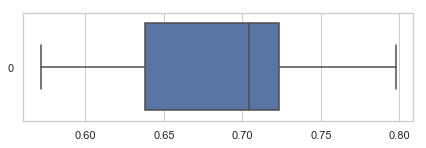

In [42]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### Train Logistic Regression using sklearn

#### Train model

In [43]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# default parameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Prediction

In [45]:
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

#### Model Interpretation: intercept and coefficients 

#### Important features

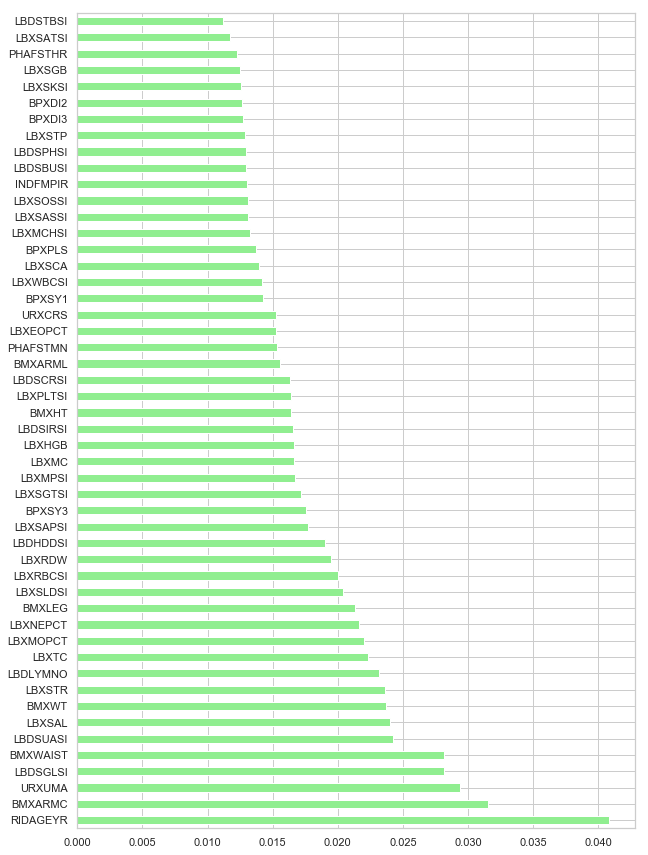

In [48]:
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(50)
   .plot(kind='barh', figsize=(10,15), color='lightgreen'))
plt.show()

#### Accuracy

In [49]:
print('Train: ',accuracy_score(y_train, y_train_pred))
print('Test: ', accuracy_score(y_test, y_test_pred))

Train:  1.0
Test:  0.6777251184834123


#### Confusion Matrix & Classification Report

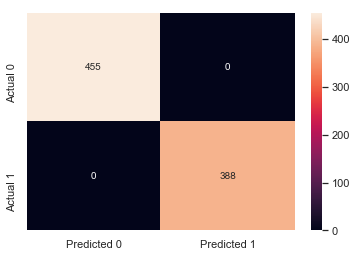

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
sns.heatmap(cm_df, annot = True, fmt="d")
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       388

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843



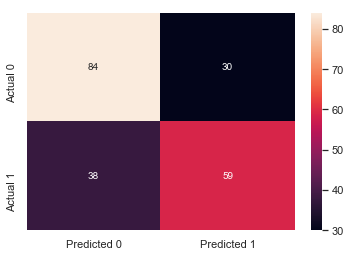

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [53]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       114
           1       0.66      0.61      0.63        97

    accuracy                           0.68       211
   macro avg       0.68      0.67      0.67       211
weighted avg       0.68      0.68      0.68       211



#### ROC AUC Score

In [54]:
print(roc_auc_score(y_train, prob_train_pred[:,1]))
print(roc_auc_score(y_test, prob_test_pred[:,1]))

1.0
0.7374751311267861


In [55]:
print(roc_auc_score(y_train, y_train_pred))
print(roc_auc_score(y_test, y_test_pred))

1.0
0.6725447639717852


#### ROC Curve

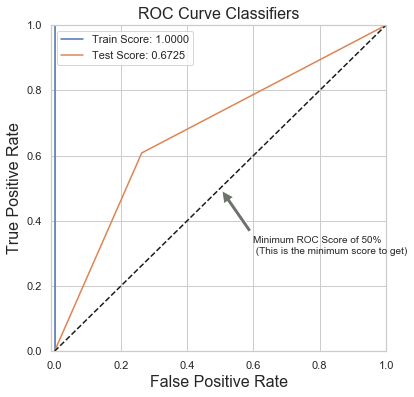

In [56]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

#### Precision-Recall curve

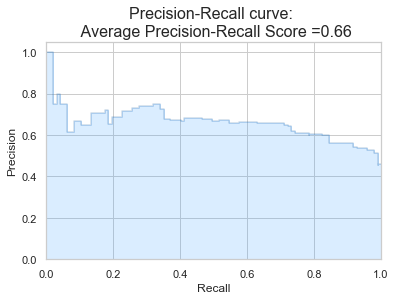

In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)
plt.show()

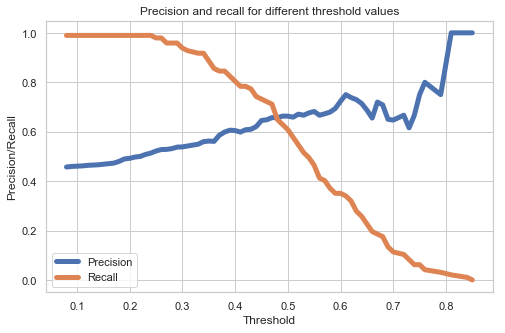

In [58]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5,1,'Precision-Recall curve: \n Average Precision-Recall Score =1.00')

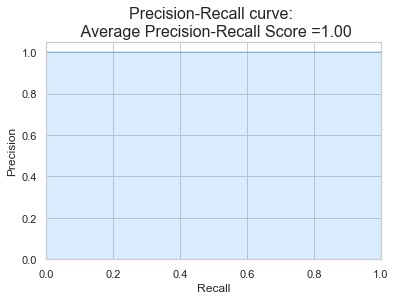

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

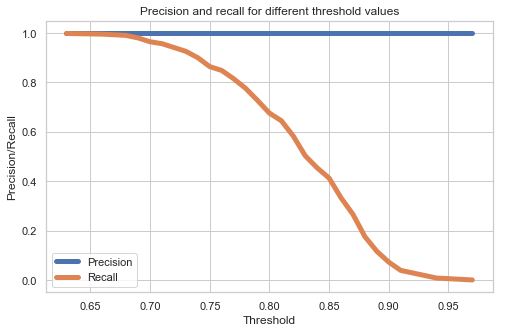

In [60]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Summary

In [61]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, y_train_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, y_test_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    
ModelEvaluation(model,X_train,y_train,X_test,y_test,'Logistic Regression')

Model Evaluation of Logistic Regression
-----------------------------------------------------------
Train set
Accuracy:  1.0
ROC AUC Score:  1.0
Confusion matrix
Predicted    0    1
Actual             
0          455    0
1            0  388
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00       388

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843

-----------------------------------------------------------
Test set
Accuracy:  0.6777251184834123
ROC AUC Score:  0.6725447639717852
Confusion matrix
Predicted   0   1
Actual           
0          84  30
1          38  59
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       114
           1       0.66      0.61      0.63        97

    accuracy                           0.68 

### Tuning hyper-parameters

#### Apply RandomizedSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

In [63]:
grid_clf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.1min finished


{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

#### GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = 1, verbose = 2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_featu

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   1.0s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   0.9s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   0.9s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_feat

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_featu

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_featu

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.5s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=8, ma

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=8, m

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=1

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325, total=   1.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325, total=   1.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=275, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, 

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   1.0s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   1.0s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   0.9s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, 

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.9s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.9s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325, total=   0.9s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, 

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=12,

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, 

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=325 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, 

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250 
[CV]  bootstrap=True, max_depth

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, 

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, 

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=275 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.9s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.6s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325, total=   0.7s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325, total=   0.8s
[CV] bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=325 
[CV]  bootstrap=True, max_de

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 17.2min finished


#### Best model

In [65]:
# default parameters
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Rerun with the best model

In [66]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 67.27% (+/- 11.17%)


In [67]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 69.29% (+/- 12.88%)


In [68]:
scores

array([0.6       , 0.69411765, 0.69411765, 0.76190476, 0.79761905,
       0.70238095, 0.71428571, 0.58333333, 0.64285714, 0.73809524])

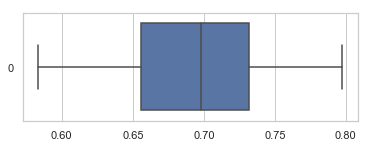

In [69]:
plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()

In [70]:
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
prob_train_pred = best_model.predict_proba(X_train)

y_test_pred = best_model.predict(X_test)
prob_test_pred = best_model.predict_proba(X_test)

In [71]:
ModelEvaluation(best_model,X_train,y_train,X_test,y_test,'LogisticRegression')

Model Evaluation of LogisticRegression
-----------------------------------------------------------
Train set
Accuracy:  0.9845788849347569
ROC AUC Score:  0.9838166987651524
Confusion matrix
Predicted    0    1
Actual             
0          452    3
1           10  378
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       455
           1       0.99      0.97      0.98       388

    accuracy                           0.98       843
   macro avg       0.99      0.98      0.98       843
weighted avg       0.98      0.98      0.98       843

-----------------------------------------------------------
Test set
Accuracy:  0.6682464454976303
ROC AUC Score:  0.6653101826731778
Confusion matrix
Predicted   0   1
Actual           
0          80  34
1          36  61
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       114
           1       0.64      0.63      0.64        97

    accuracy   

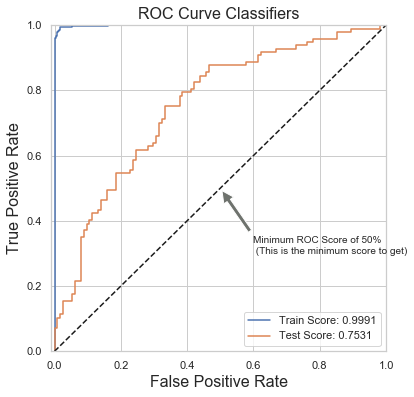

In [72]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

In [73]:
y_score = best_model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)

precision_recall_df = pd.DataFrame([precision[0:len(threshold)],recall[0:len(threshold)],threshold]).T
precision_recall_df.columns = ['precision','recall','threshold']
precision_recall_df.head(6)

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [ ]:
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

In [ ]:
sns.set(style = 'whitegrid',context = 'notebook')
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()